## Chap03) Classification
## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = np.array([6,8,12,15,20])
y = np.array([7,11,13,20.5, 19.3])

(0.0, 30.0, 0.0, 30.0)

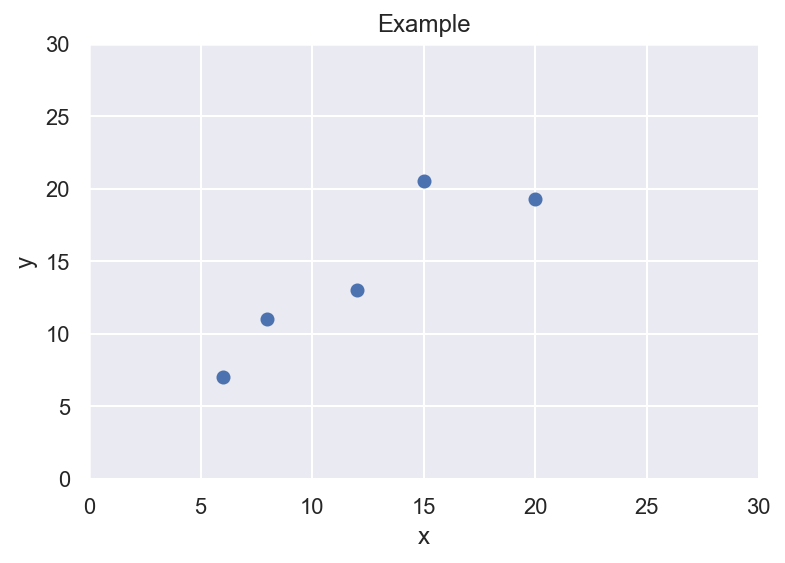

In [4]:
plt.figure()
plt.plot(x, y, 'o')
plt.title('Example')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 30, 0, 30])
#plt.grid()

## 1)Dataset

#### -데이터 분석에 사용할 데이터를 Scikit learn으로부터 불러온다  
Breast_cancer Dataset  
Malignant(악성), Benign(양성)  
Dataset info LINK : https://scikit-learn.org/stable/datasets/index.html

#### -위스콘신대 유방암 진단 데이터(WDBC)
- class   : 2
- 샘플수 : 569개
- Feature : 32개 (ID, 진단결과, 30개의 실측값) 
- Samples per class : 212(M), 357(B)

-유방암 데이터로 악성(M), 양성(B) 판단하는 모델 만들기

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

br_cancer = load_breast_cancer()
br_cancer # dict형태

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
br_cancer['DESCR']
br_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
br_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
x=pd.DataFrame(br_cancer.data)
y=pd.Series(br_cancer.target)

x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
x.values[:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

In [18]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.3, random_state=1234)

In [19]:
print(x_train.shape)
print(x_test.shape)

(398, 30)
(171, 30)


## 2) Model

#### - Scikit learn 에서 제공하는 Logistic Regression 라이브러리를 가지고 와서 모델로 사용한다

In [21]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression().fit(x_train, y_train)
model

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print(model.coef_[0])
print(len(model.coef_))
print(model.intercept_)

[ 0.90168632  0.5032917   0.20780407 -0.00521102 -0.0328317  -0.1679513
 -0.2165549  -0.09148835 -0.03502028 -0.00877     0.04300548  0.35491376
  0.06222169 -0.10203233 -0.00133738 -0.0341101  -0.03836684 -0.01070095
 -0.00242522 -0.00363742  1.00212472 -0.53257658 -0.19257415 -0.02053102
 -0.06000487 -0.54670485 -0.62531035 -0.18273367 -0.11892725 -0.0539082 ]
1
[0.19408635]


In [24]:
print('Train Accuracy : ', model.score(x_train, y_train) )
print('Test Accuracy : ', model.score(x_test, y_test)  )

Train Accuracy :  0.9547738693467337
Test Accuracy :  0.9181286549707602


## 3) Hyperparameter조정  

-C: 정규화 규제 조절 상수, 식에서 보인 람다와 역수 관계. 
    - C가 커지면 규제가 작아지는 것. 
    - C가 작아지면 규제가 커지는 것. C가 작을수록 오버피팅 방지하는 효과가 있는 것. 
-solver: 최적화에 사용할 알고리즘 결정  
-max_iter: 최적화가 수렴하게 만드는 최대 반복 횟수 값   (default=100)  
-penalty: L1, L2 제약 조건 설정  

### -C값 조절 (&max_iter)

In [25]:
model1 = LogisticRegression(C=0.01 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model2 = LogisticRegression(C= 0.1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model3 = LogisticRegression(C=1 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model4 = LogisticRegression(C=10 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model5 = LogisticRegression(C=100 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', model1.score(x_train, y_train))
print('Train Accuracy : ', model2.score(x_train, y_train))
print('Train Accuracy : ', model3.score(x_train, y_train))
print('Train Accuracy : ', model4.score(x_train, y_train))
print('Train Accuracy : ', model5.score(x_train, y_train))

Train Accuracy :  0.9597989949748744
Train Accuracy :  0.9623115577889447
Train Accuracy :  0.9723618090452262
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9874371859296482


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
print('Test Accuracy : ', model1.score(x_test, y_test))
print('Test Accuracy : ', model2.score(x_test, y_test))
print('Test Accuracy : ',  model3.score(x_test, y_test)  )
print('Test Accuracy : ', model4.score(x_test, y_test))
print('Test Accuracy : ', model5.score(x_test, y_test))

Test Accuracy :  0.9298245614035088
Test Accuracy :  0.9298245614035088
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9473684210526315
Test Accuracy :  0.935672514619883


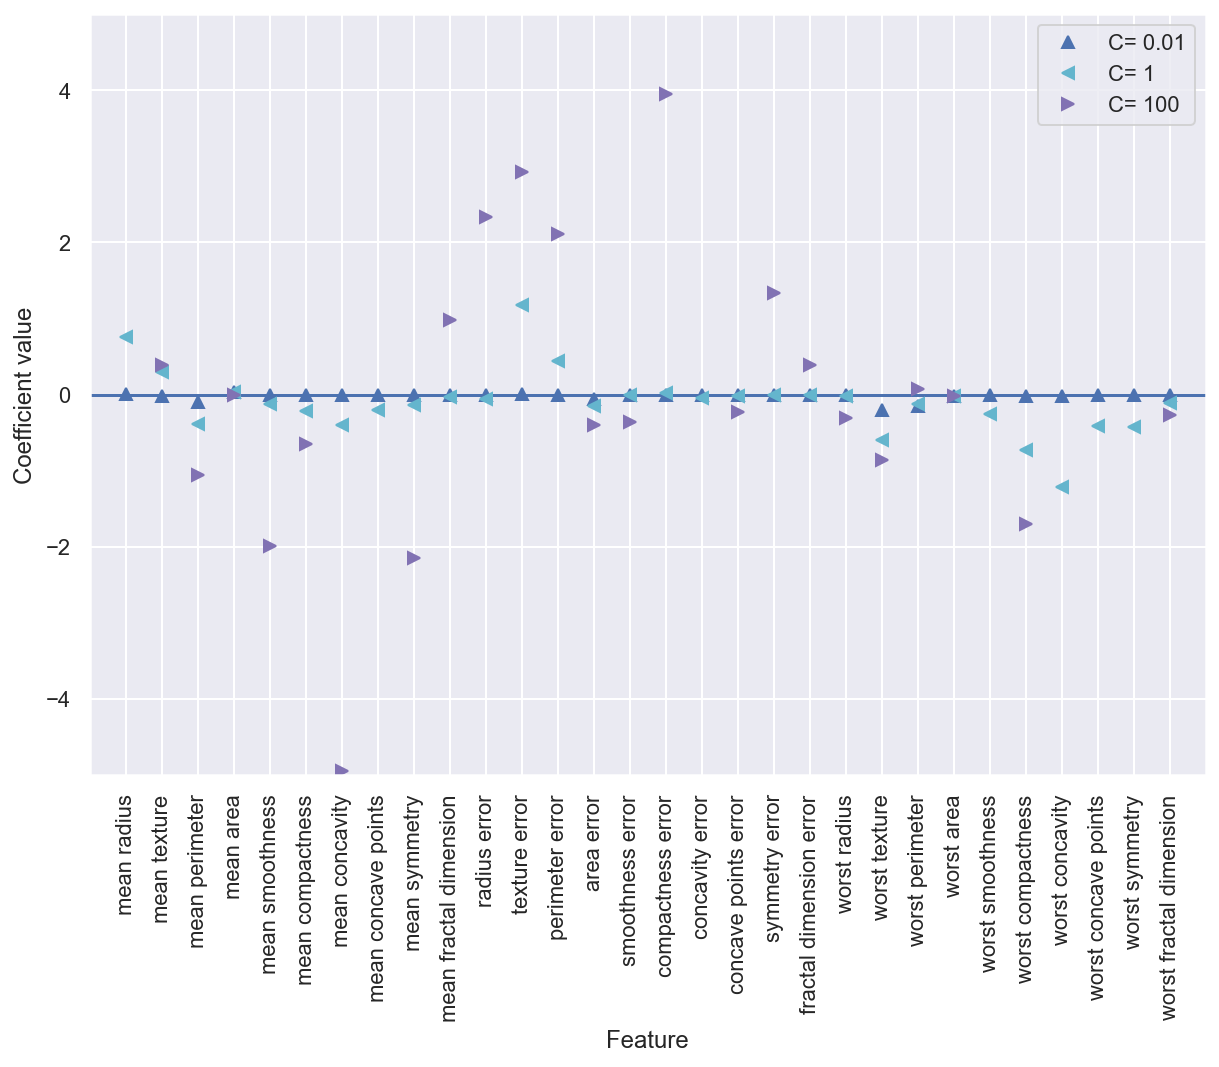

In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize= (10,7))  #figsize 그래프 크기 조절

plt.plot(model1.coef_.T, '^b', label="C= 0.01") 
plt.plot(model3.coef_.T, '<c', label="C= 1")
plt.plot(model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(br_cancer.data.shape[1]), br_cancer.feature_names, rotation=90) # X축 범주 넣기

xlims = plt.xlim(-1,30)
plt.hlines(0, -1, 30) # 수평선 긋기  hlines(y값, x최소값, x최대값)
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

### -L2 정규화 적용

In [31]:
l2_model1 = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model2 = LogisticRegression(penalty='l2',C=0.1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model3 = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model4 = LogisticRegression(penalty='l2',C=10, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model5 = LogisticRegression(penalty='l2',C=100, solver='lbfgs', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', l2_model1.score(x_train, y_train))
print('Train Accuracy : ', l2_model2.score(x_train, y_train))
print('Train Accuracy : ', l2_model3.score(x_train, y_train))
print('Train Accuracy : ', l2_model4.score(x_train, y_train))
print('Train Accuracy : ', l2_model5.score(x_train, y_train))

Train Accuracy :  0.9597989949748744
Train Accuracy :  0.9623115577889447
Train Accuracy :  0.9723618090452262
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9874371859296482


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
print('Test Accuracy : ', l2_model1.score(x_test, y_test))
print('Test Accuracy : ', l2_model2.score(x_test, y_test))
print('Test Accuracy : ', l2_model3.score(x_test, y_test))
print('Test Accuracy : ', l2_model4.score(x_test, y_test))
print('Test Accuracy : ', l2_model5.score(x_test, y_test))

Test Accuracy :  0.9298245614035088
Test Accuracy :  0.9298245614035088
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9473684210526315
Test Accuracy :  0.935672514619883


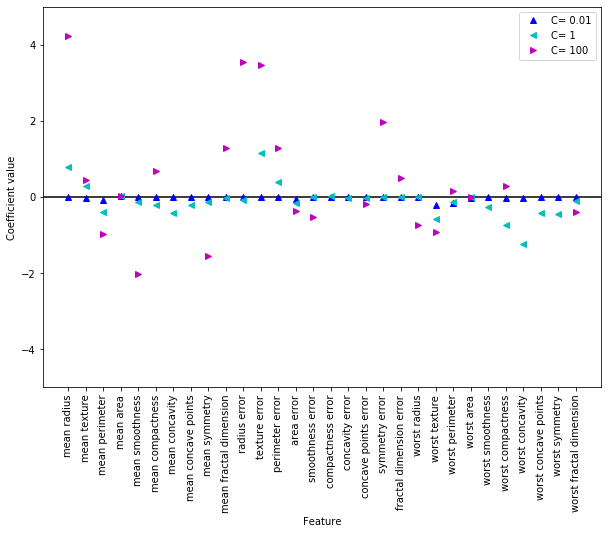

In [17]:
plt.figure(figsize= (10,7))

plt.plot(l2_model1.coef_.T, '^b', label="C= 0.01")
plt.plot(l2_model3.coef_.T, '<c', label="C= 1")
plt.plot(l2_model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(br_cancer.data.shape[1]), br_cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

### L1 정규화 적용

In [33]:
l1_model1 = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model2 = LogisticRegression(penalty='l1',C=0.1, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model3 = LogisticRegression(penalty='l1',C=1, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model4 = LogisticRegression(penalty='l1',C=10, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model5 = LogisticRegression(penalty='l1',C=100, solver='liblinear', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', l1_model1.score(x_train, y_train))
print('Train Accuracy : ', l1_model2.score(x_train, y_train))
print('Train Accuracy : ', l1_model3.score(x_train, y_train))
print('Train Accuracy : ', l1_model4.score(x_train, y_train))
print('Train Accuracy : ', l1_model5.score(x_train, y_train))

Train Accuracy :  0.9271356783919598
Train Accuracy :  0.9422110552763819
Train Accuracy :  0.9673366834170855
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9974874371859297


In [34]:
print('Test Accuracy : ', l1_model1.score(x_test, y_test))
print('Test Accuracy : ', l1_model2.score(x_test, y_test))
print('Test Accuracy : ', l1_model3.score(x_test, y_test))
print('Test Accuracy : ', l1_model4.score(x_test, y_test))
print('Test Accuracy : ', l1_model5.score(x_test, y_test))

Test Accuracy :  0.9181286549707602
Test Accuracy :  0.9239766081871345
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9415204678362573
Test Accuracy :  0.9532163742690059


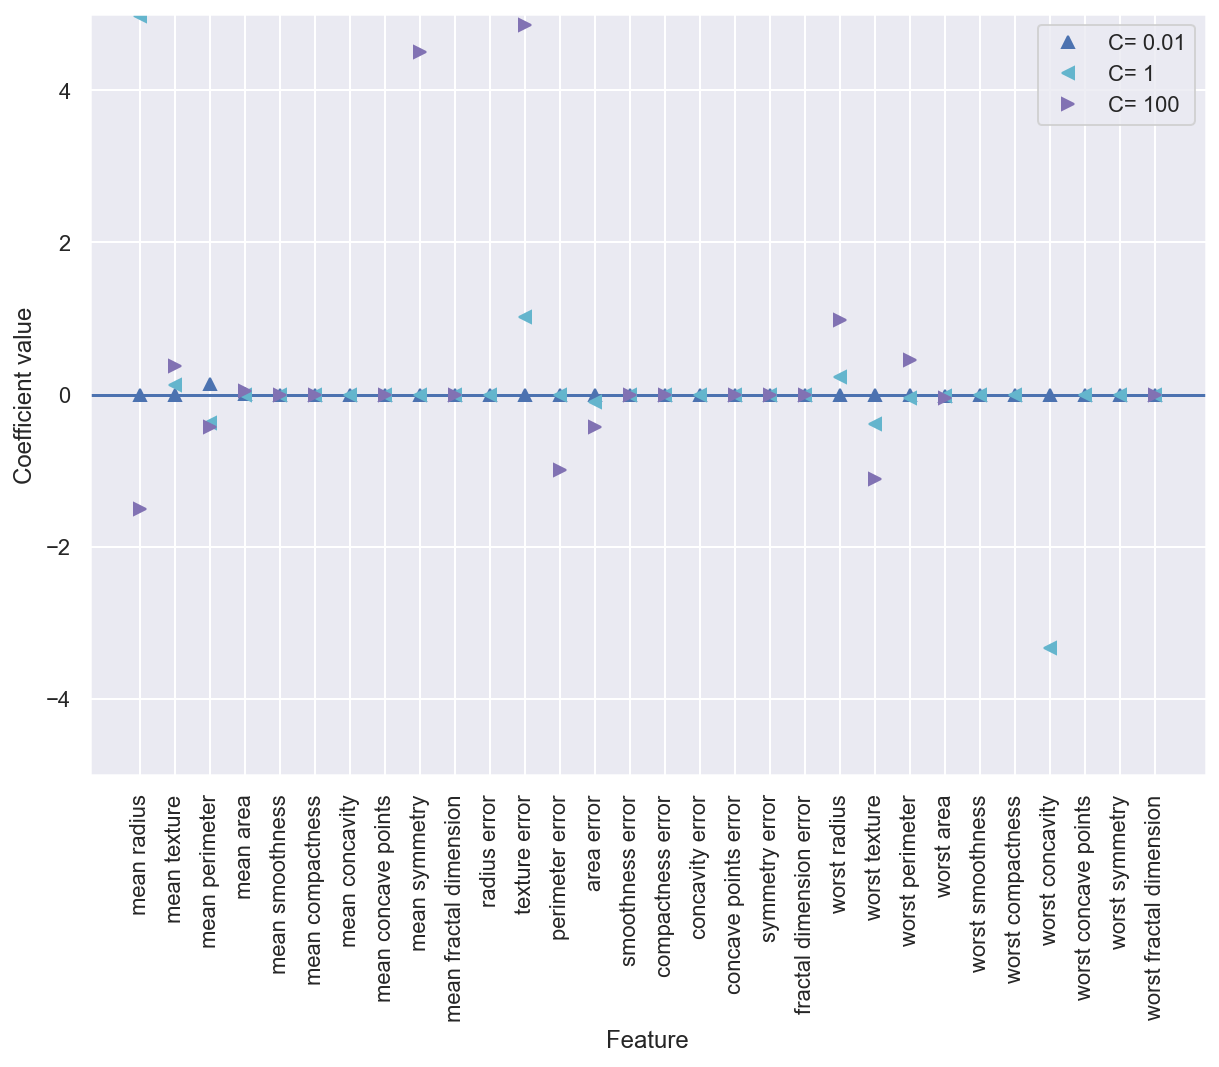

In [35]:
plt.figure(figsize= (10,7))

plt.plot(l1_model1.coef_.T, '^b', label="C= 0.01")
plt.plot(l1_model3.coef_.T, '<c', label="C= 1")
plt.plot(l1_model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(br_cancer.data.shape[1]), br_cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()